# Processing CA airports

### Load Python tools

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
import altair as alt
from altair_saver import save
import geojson
import json
import altair_latimes as lat
alt.themes.register('latimes', lat.theme)
alt.themes.enable('latimes')

ThemeRegistry.enable('latimes')

## Read airports geo file

In [2]:
# https://gis.data.ca.gov/datasets/6a152cc396434c989adb89fb3132bc41_0
url = 'https://opendata.arcgis.com/datasets/6a152cc396434c989adb89fb3132bc41_0.geojson'

In [3]:
airports = gpd.read_file(url)

In [ ]:
airports.head()

In [19]:
airports.columns = airports.columns.str.strip().str.lower().str.replace(' ', '_')\
                    .str.replace('(', '').str.replace(')', '').str.replace('-','_')

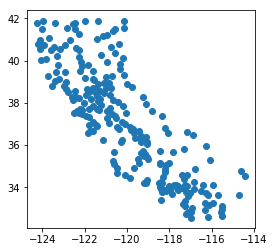

In [20]:
airports.plot()

In [30]:
airports['maplabel'] = airports['maplabel']\
    .str.replace('INT\'L','', regex=False).str.replace(' -139','', regex=False)

In [31]:
socal = ['Los Angeles', 'Ventura', 'San Bernardino','Riverside', 'Orange']
bayarea = ['Alameda', 'Contra Costa', 'Marin', 'Napa', \
           'San Francisco', 'San Mateo', 'Santa Clara', 'Solano', 'Sonoma']

In [32]:
socal_airports = airports[(airports['county'].isin(socal)) &\
                         (airports['fnctnlclss'] == 'Commercial/Primary')]

In [33]:
commercial_airports = airports[airports['fnctnlclss'] == 'Commercial/Primary']

In [34]:
commercial_airports.to_csv('output/commercial_airports.csv', index=False)

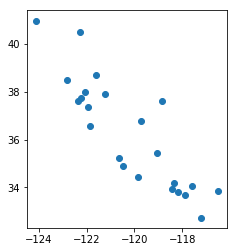

In [35]:
commercial_airports.plot()

In [42]:
bayarea_airports = airports[(airports['county'].isin(bayarea)) &\
                         (airports['fnctnlclss'] == 'Commercial/Primary')]

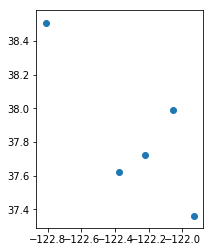

In [43]:
bayarea_airports.plot()

In [44]:
socal_airports.airportid.tolist()

['BUR', 'SNA', 'LGB', 'LAX', 'ONT', 'PSP']

In [45]:
bayarea_airports.AIRPORTID.tolist()

AttributeError: 'GeoDataFrame' object has no attribute 'AIRPORTID'

In [46]:
commercial_airports.head(20)

,objectid,objectid_1,objectid_2,facility,maplabel,airportid,city,county,fnctnlclss,classcode,...,longdd,latdms,pmtlat,longdms,arplatdms,arplongdms,arplats,arplongs,pmtlong,geometry
8,9,30,30,ARCATA AIRPORT,ARCATA,ACV,Arcata/Eureka,Humboldt,Commercial/Primary,1,...,-124.108611,40-58-41.215N,40-58-41N,124-06-31.028W,40-58-40.2000N,124-06-30.5000W,147520.2000N,446790.5000W,124-06-31W,POINT (-124.10861 40.97811)
20,21,41,42,BOB HOPE AIRPORT,BOB HOPE,BUR,Burbank,Los Angeles,Commercial/Primary,1,...,-118.358667,34-12-02.400N,34-12-02N,118-21-31.200W,34-12-02.4000N,118-21-31.2000W,123122.4000N,426091.2000W,118-21-31W,POINT (-118.35867 34.20067)
28,29,46,47,BUCHANAN FIELD AIRPORT,BUCHANAN FIELD,CCR,Concord,Contra Costa,Commercial/Primary,1,...,-122.056889,37-59-22.763N,37-59-23N,122-03-24.830W,37-59-22.8000N,122-03-24.8000W,136762.8000N,439404.8000W,122-03-25W,POINT (-122.05689 37.98967)
41,42,218,228,"CHARLES M. SCHULZ, SONOMA COUNTY AIRPORT",CHARLES M. SCHULZ,STS,Santa Rosa,Sonoma,Commercial/Primary,1,...,-122.812875,38-30-32.317N,38-30-32N,122-48-46.369W,38-30-32.3605N,122-48-46.3503W,138632.3605N,442126.3503W,122-48-46W,POINT (-122.81288 38.50899)
69,70,77,81,FRESNO YOSEMITE INTERNATIONAL AIRPORT,FRESNO YOSEMITE,FAT,Fresno,Fresno,Commercial/Primary,1,...,-119.718139,36-46-34.300N,36-46-34N,119-43-05.300W,36-46-34.3000N,119-43-05.3000W,132394.3000N,430985.3000W,119-43-05W,POINT (-119.71814 36.77619)
101,102,215,225,"JOHN WAYNE AIRPORT, ORANGE CO.",JOHN WAYNE,SNA,Santa Ana,Orange,Commercial/Primary,1,...,-117.868222,33-40-32.371N,33-40-32N,117-52-05.601W,33-40-32.4000N,117-52-05.6000W,121232.4000N,424325.6000W,117-52-06W,POINT (-117.86822 33.67567)
115,116,124,131,LONG BEACH AIRPORT DAUGHERTY FIELD,LONG BEACH,LGB,Long Beach,Los Angeles,Commercial/Primary,1,...,-118.151651,33-49-03.800N,33-49-04N,118-09-05.800W,33-49-03.9975N,118-09-05.9436W,121743.9975N,425345.9436W,118-09-06W,POINT (-118.15165 33.81778)
117,118,123,130,LOS ANGELES INTERNATIONAL AIRPORT,LOS ANGELES,LAX,Los Angeles,Los Angeles,Commercial/Primary,1,...,-118.407161,33-56-33.130N,33-56-33N,118-24-29.068W,33-56-32.9838N,118-24-29.0462W,122192.9838N,426269.0462W,118-24-29W,POINT (-118.40716 33.94252)
120,121,139,146,MAMMOTH YOSEMITE AIRPORT,MAMMOTH YOSEMITE,MMH,Mammoth Lakes,Mono,Commercial/Primary,1,...,-118.838750,37-37-26.575N,37-37-27N,118-50-15.980W,37-37-26.6000N,118-50-19.5000W,135446.6000N,427819.5000W,118-50-16W,POINT (-118.83875 37.62406)
125,126,36,37,MEADOWS FIELD AIRPORT,MEADOWS FIELD,BFL,Bakersfield,Kern,Commercial/Primary,1,...,-119.057667,35-26-00.953N,35-26-01N,119-03-24.365W,35-26-01.9000N,119-03-27.6000W,127561.9000N,428607.6000W,119-03-24W,POINT (-119.05767 35.43386)


In [47]:
commercial_airports.to_file('/Users/mhustiles/data/data/GIS/california/\
CA_Airport_Boundaries/commercial_airports.geojson', driver='GeoJSON')